### Day and Night Image Classifier

The day/night image dataset consists of 200 RGB color images in two categories: 100 day images and 100 night images.

We'd like to build a classifier that can accurately label these images as day or night, and that relies on finding distinguishing features between the two types of images!

Note: All images come from the [AMOS dataset](http://cs.uky.edu/~jacobs/datasets/amos/) (Archive of Many Outdoor Scenes).*

In [1]:
import cv2
import helpers

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

### Training and Testing Data
The 200 day/night images are separated into training and testing datasets. 

* 60% of these images are training images, for you to use as you create a classifier.
* 40% are test images, which will be used to test the accuracy of your classifier.

First, we set some variables to keep track of some where our images are stored:

    image_dir_training: the directory where our training image data is stored
    image_dir_test: the directory where our test image data is stored

In [2]:
# Image data directories
image_dir_training = 'day_night_images/training/'
image_dir_test = 'day_night_images/test/'

### Load the datasets

These first few lines of code will load the training day/night images and store all of them in a variable, `IMAGE_LIST`. This list contains the images and their associated label ("day" or "night"). 

For example, the first image-label pair in `IMAGE_LIST` can be accessed by index: 
``` IMAGE_LIST[0][:]```.


In [3]:
# Load training data
IMAGE_LIST = helpers.load_dataset(image_dir_training)

### 1. Visualize the input images

This image label is day with shape:  (614, 857, 3)


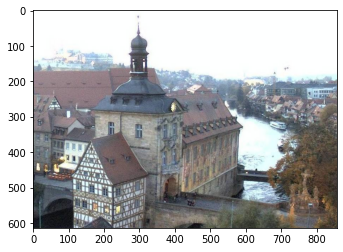

In [9]:
# Select an image and its label by list index
image_index = 0
selected_image = IMAGE_LIST[image_index][0]
selected_label = IMAGE_LIST[image_index][1]

print('This image label is', selected_label, 'with shape: ', selected_image.shape)
plt.imshow(selected_image)

### 2. Pre-process the Data

After loading in each image, you have to standardize the input and output. 

#### Solution code

You are encouraged to try to complete this code on your own, but if you are struggling or want to make sure your code is correct, there i solution code in the `helpers.py` file in this directory. You can look at that python file to see complete `standardize_input` and `encode` function code. For this day and night challenge, you can often jump one notebook ahead to see the solution code for a previous notebook!

---
#### Input

It's important to make all your images the same size so that they can be sent through the same pipeline of classification steps! Every input image should be in the same format, of the same size, and so on.

#### TODO: Standardize the input images

* Resize each image to the desired input size: 600x1100px (hxw).

In [10]:
def standardize_input(image):
    
    standard_im = cv2.resize(image, (1100, 600))
    
    return standard_im

### TODO: Standardize the output

With each loaded image, you also need to specify the expected output. For this, use binary numerical values 0/1 = night/day.

In [11]:
def encode(label):
    num = 0 if label == 'night' else 1
    return num

### Construct STANDARDIZE_LIST

This function takes in a lisst of image-label pairs and outputs a standardized list of resized images and numerical labels.

In [12]:
def standardize(image_list):
    standard_list = []
    for item in image_list:
        image = item[0]
        label = item[1]
        
        standardized_im = standardize_input(image)
        binary_label = encode(label)
        
        standard_list.append((standardized_im, binary_label))
    return standard_list

In [13]:
STANDARDIZED_LIST = standardize(IMAGE_LIST)

### Visualize the standardized data

This image label is 1 with shape:  (600, 1100, 3)


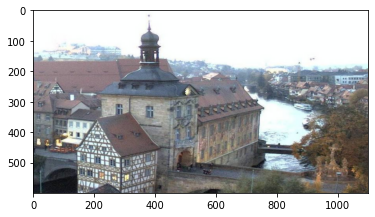

In [14]:
selected_image = STANDARDIZED_LIST[0][0]
selected_label = STANDARDIZED_LIST[0][1]

# Display image and label about it.

print('This image label is', selected_label, 'with shape: ', selected_image.shape)
plt.imshow(selected_image)

### Feature Extraction

Create a feature that represents the brightness in an image. We will be extracting the average brightness using HSV colorspace. Specifically, we'll use the V channel(a measure of brightness), add up the pixel values in the V channel, then divide that sum by the area of the image to get the average Value of the image.

### RGB to HSV conversion

Below, a test image is converted from RGB to HSV colorspace and each component is displayed in an image.

Label: 1


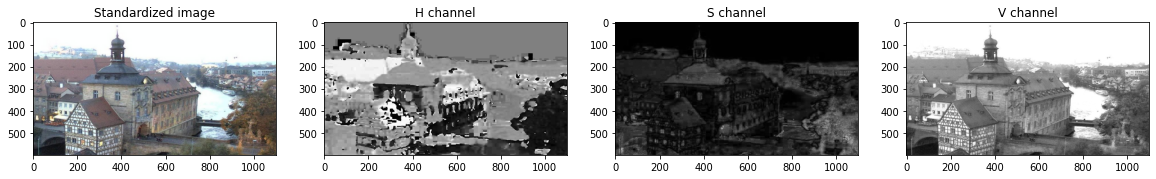

In [15]:
# Convert to HSV
hsv = cv2.cvtColor(selected_image, cv2.COLOR_RGB2HSV)

# Print image label
print('Label:', selected_label)

# HSV channels
h = hsv[:, :, 0]
s = hsv[:, :, 1]
v = hsv[:, :, 2]

# Plot the orignal image and three channels
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 10))
ax1.set_title('Standardized image')
ax1.imshow(selected_image)
ax2.set_title('H channel')
ax2.imshow(h, cmap='gray')
ax3.set_title('S channel')
ax3.imshow(s, cmap='gray')
ax4.set_title('V channel')
ax4.imshow(v, cmap='gray')

### Find the average brightness using the V channel

In [16]:
def avg_brightness(image):
    # Convert image to HSV
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    
    # Add up all the pixel values in the V channel
    sum_brightness = np.sum(hsv[:, :, 2])
    
    # Calculate the average brightness using the area of image
    # and the sum calculated above.
    area = 600 * 1100.
    avg = sum_brightness / area
    
    return avg

Avg brightness: 123.61741969696969


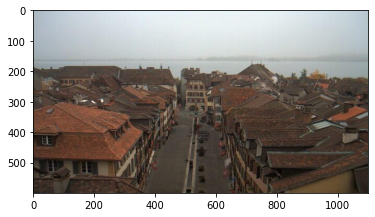

In [17]:
test_im = STANDARDIZED_LIST[100][0]
test_label = STANDARDIZED_LIST[100][1]

avg = avg_brightness(test_im)
print('Avg brightness:', avg)
plt.imshow(test_im)

### Build a complete classifier

In [18]:
def estimate_label(image):
    avg = avg_brightness(image)
    # set the value of a threshold that will separate day and night images
    threshold = 100
    predicted_label = 0 if avg < threshold else 1
    
    return predicted_label

### Testing the classifier

In [21]:
TEST_IMAGE_LIST = helpers.load_dataset(image_dir_test)

STANDARDIZED_TEST_LIST = helpers.standardize(TEST_IMAGE_LIST)

def get_misclassified_images(images):
    
    misclassified_images_labels = []
    for image in images:
        im = image[0]
        true_label = image[1]
        
        predicted_label = estimate_label(im)
        
        if (predicted_label != true_label):
            misclassified_images_labels.append((im, predicted_label, true_label))
    return misclassified_images_labels


MISCLASSIFIED = get_misclassified_images(STANDARDIZED_TEST_LIST)

accuracy = 1. - float(len(MISCLASSIFIED) / len(STANDARDIZED_TEST_LIST))

print('Accuracy:', accuracy)

Accuracy: 0.925


### Visualize the misclassified images

Label: 0


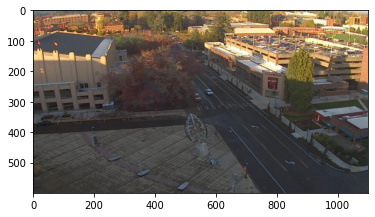

In [22]:
mis = MISCLASSIFIED[0][0]
print('Label:', MISCLASSIFIED[0][1])
plt.imshow(mis)